MAX Score for [1, 2, 3, 4, 5] is 16.0
MAX Score for [6, 7, 8, 9, 10] is 36.0
MAX Score for [11, 12, 13, 14, 15] is 56.00000000000001
MAX Score for [16, 17, 18, 19, 20] is 76.0
MAX Score for [21, 22, 23, 24, 25] is 96.0
MAX Score for [1, 6, 11, 16, 21] is 80.0
MAX Score for [2, 7, 12, 17, 22] is 84.0
MAX Score for [3, 8, 13, 18, 23] is 88.0
MAX Score for [4, 9, 14, 19, 24] is 92.0
MAX Score for [5, 10, 15, 20, 25] is 96.0


<Figure size 432x288 with 0 Axes>

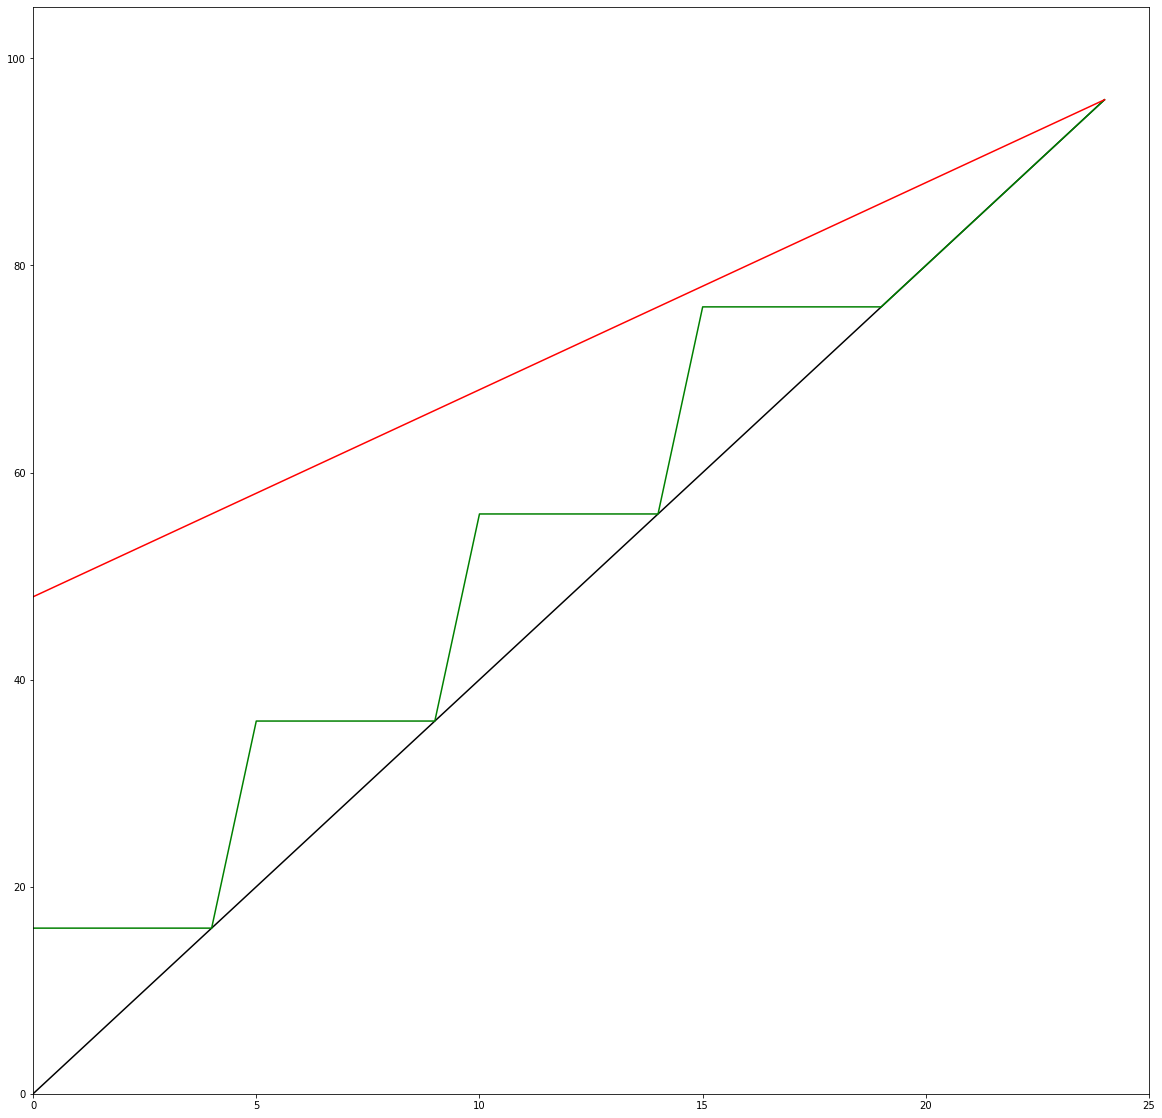

In [132]:
from numpy import arange
import matplotlib.pyplot as plt
import random
import statistics

 
# pools = [
#     [1,2,3,4,5,6,7,8,9], [10,11,12,13,14,15,16,17,18],[19,20,21,22,23,24,25,26,27],
#     [1,10,19,4,13,22,7,16,25],[2,11,20,5,14,23,8,17,26],[3,12,21,6,15,24,9,18,27],
#     [1,2,3,10,11,12,19,20,21],[4,5,6,13,14,15,22,23,24],[7,8,9,16,17,18,25,26,27]]

pools = [[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15], [16,17,18,19,20], [21,22,23,24,25],
         [1,6,11,16,21], [2,7,12,17,22], [3,8,13,18,23], [4,9,14,19,24], [5,10,15,20,25]]


N_students = 25 # 27 for other pools option
average_grade = 80
grade_standard_deviation = 10
individual_student_standard_deviation = 3
cube_side = 3

student_averages = []

for idx in arange(N_students):
    student_averages.append(min(100,random.gauss(average_grade,grade_standard_deviation)))

    
#print(student_averages)


student_scores = []
#for idx in arange(N_students):
#    student_scores.append(min(100,random.gauss(student_averages[idx], individual_student_standard_deviation)))

student_scores = [ x/N_students*100.0 for x in arange(N_students) ]

student_scores.sort()

#print(student_scores)
pool_scores = []
for pool_index in arange(len(pools)):
    max_pool_score = -1
    for student_number in pools[pool_index]:
        if (student_scores[student_number-1] > max_pool_score):
            max_pool_score = student_scores[student_number-1]

    print('MAX Score for ' + str(pools[pool_index]) + ' is ' + str(max_pool_score))
    pool_scores.append(max_pool_score)

min_pooled_scores = [1000]*N_students
median_pooled_scores = [[] for _ in range(N_students)]

#print('------------')
#print(median_pooled_scores)
#print('------------')
for pool_index in arange(len(pools)):
    pool = pools[pool_index]
    for student_number in pool: #pool
        if (min_pooled_scores[student_number-1] > pool_scores[pool_index]):
            min_pooled_scores[student_number-1] = pool_scores[pool_index]
            
        median_pooled_scores[student_number-1].append(pool_scores[pool_index])
            
#print(median_pooled_scores)
#print('------------')
median_scores = [0]*N_students
for idx in arange(len(min_pooled_scores)):
    #print(str(idx) + ' '  + str(min_pooled_scores[idx]) + ' ' + str(statistics.median(median_pooled_scores[idx])) + ' ' + str(student_scores[idx]))
    median_scores[idx] = statistics.median(median_pooled_scores[idx])
    
    
plt.figure(1)
plt.figure(figsize=(20,20))
plt.plot(student_scores, 'k', label='Individual Scheme')
plt.plot(min_pooled_scores, 'g', label='Minimum Pooled Scheme')
plt.plot(median_scores, 'r', label='Median Pooled Scheme')

plt.ylim(0, 105)
plt.xlim(0, N_students)

plt.savefig('/Users/kootsoop/Pictures/Pooled-Marking-Schemes-N=' + str(len(pools[0])) + '.png')

